# 07 Regression dengan KNN (K Nearest Neighbour)

Referensi: [https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)

## Sample Dataset

In [1]:
import pandas as pd

sensus = {'tinggi': [158, 170, 183, 191, 155, 163, 180, 158, 170], 
          'jk': ['pria', 'pria', 'pria', 'pria', 'wanita', 'wanita', 'wanita', 'wanita', 'wanita'],
          'berat': [64, 86, 84, 80, 49, 59, 67, 54, 67]}

sensus_df = pd.DataFrame(sensus)
sensus_df

,tinggi,jk,berat
0,158,pria,64
1,170,pria,86
2,183,pria,84
3,191,pria,80
4,155,wanita,49
5,163,wanita,59
6,180,wanita,67
7,158,wanita,54
8,170,wanita,67


## Visualisasi Data

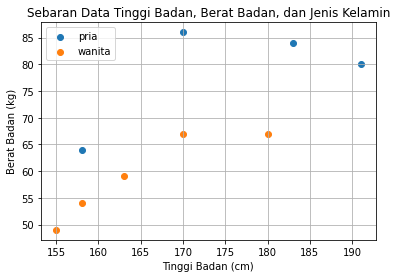

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for jk, d in sensus_df.groupby('jk'):
    ax.scatter(d['tinggi'], d['berat'], label=jk)

plt.legend(loc='upper left')
plt.title('Sebaran Data Tinggi Badan, Berat Badan, dan Jenis Kelamin')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Berat Badan (kg)')
plt.grid(True)
plt.show()

## Regression dengan KNN

### Preprocess Dataset

In [3]:
import numpy as np

X_train = np.array(sensus_df[['tinggi', 'jk']])
y_train = np.array(sensus_df['berat'])

print(f'X_train:\n{X_train}\n')
print(f'y_train: {y_train}')

X_train:
[[158 'pria']
 [170 'pria']
 [183 'pria']
 [191 'pria']
 [155 'wanita']
 [163 'wanita']
 [180 'wanita']
 [158 'wanita']
 [170 'wanita']]

y_train: [64 86 84 80 49 59 67 54 67]


### Preprocess Dataset: Konversi Label menjadi Numerik Biner

In [4]:
X_train_transposed = np.transpose(X_train)

print(f'X_train:\n{X_train}\n')
print(f'X_train_transposed:\n{X_train_transposed}')

X_train:
[[158 'pria']
 [170 'pria']
 [183 'pria']
 [191 'pria']
 [155 'wanita']
 [163 'wanita']
 [180 'wanita']
 [158 'wanita']
 [170 'wanita']]

X_train_transposed:
[[158 170 183 191 155 163 180 158 170]
 ['pria' 'pria' 'pria' 'pria' 'wanita' 'wanita' 'wanita' 'wanita'
  'wanita']]


In [5]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb.fit(X_train_transposed[1])

jk_binarised = lb.transform(X_train_transposed[1])

print(f'jk: {X_train_transposed[1]}\n')
print(f'jk_binarised:\n{jk_binarised}')

jk: ['pria' 'pria' 'pria' 'pria' 'wanita' 'wanita' 'wanita' 'wanita' 'wanita']

jk_binarised:
[[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [6]:
jk_binarised = jk_binarised.flatten()
jk_binarised

array([0, 0, 0, 0, 1, 1, 1, 1, 1])

In [7]:
X_train_transposed[1] = jk_binarised
X_train = X_train_transposed.transpose()

print(f'X_train_transposed:\n{X_train_transposed}\n')
print(f'X_train:\n{X_train}')

X_train_transposed:
[[158 170 183 191 155 163 180 158 170]
 [0 0 0 0 1 1 1 1 1]]

X_train:
[[158 0]
 [170 0]
 [183 0]
 [191 0]
 [155 1]
 [163 1]
 [180 1]
 [158 1]
 [170 1]]


### Training KNN Regression Model

In [8]:
from sklearn.neighbors import KNeighborsRegressor

K = 3
model = KNeighborsRegressor(n_neighbors=K)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

### Prediksi Berat Badan

In [9]:
X_new = np.array([[155, 1]])
X_new

array([[155,   1]])

In [10]:
y_pred = model.predict(X_new)
y_pred

array([55.66666667])

### Evaluasi KNN Regression Model

In [11]:
X_test = np.array([[168, 1], [180, 1], [160, 0], [169, 0]])
y_test = np.array([65, 96, 52, 67])

print(f'X_test:\n{X_test}\n')
print(f'y_test: {y_test}')

X_test:
[[168   1]
 [180   1]
 [160   0]
 [169   0]]

y_test: [65 96 52 67]


In [12]:
y_pred = model.predict(X_test)
y_pred

array([70.66666667, 72.66666667, 59.        , 70.66666667])

#### Mean Absolute Error (MAE) atau Mean Absolute Deviation (MAD)

$MAE$ is the average of the absolute values of the errors of the predictions.

$MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$

Referensi: [https://en.wikipedia.org/wiki/Mean_absolute_error](https://en.wikipedia.org/wiki/Mean_absolute_error)

In [13]:
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(y_test, y_pred)

print(f'MAE: {MAE}')

MAE: 9.916666666666668
